![titanic](https://media.timeout.com/images/100654045/750/422/image.jpg)

# Introduction

This notebook explores the use of different machine learning models to predict the survival of passengers on the Titanic. The goal of this project is to compare the performance of five models, including a neural network, logistic regression, random forest, support vector machine, and XGBoost, and determine which model produces the most accurate predictions.



# Code

This code cell imports the necessary Python libraries required for this notebook. The libraries are:

- numpy: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

- pandas: A library for data manipulation and analysis.

- seaborn: A library for data visualization based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

- tensorflow: A machine learning library for creating and training neural networks.

- SVC: A Support Vector Machine (SVM) classifier for classification problems.

- plotly.express: A library for creating interactive visualizations.

- matplotlib: A plotting library for the Python programming language.

- XGBClassifier: An implementation of the gradient boosting decision tree algorithm using the XGBoost library.

- MinMaxScaler: A scaler that scales features to a specified range.

- RandomForestClassifier: A classification algorithm that builds a forest of decision trees and combines their predictions to make accurate classifications.

- LogisticRegression: A classification algorithm that uses a logistic function to model a binary dependent variable.

- train_test_split: A function that splits data into training and testing sets for model training and evaluation.

- f1_score: A metric that measures the weighted average of the precision and recall of a model's predictions.

- classification_report: A function that generates a report of various classification metrics such as precision, recall, and F1-score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

This code cell loads the Titanic dataset from the Seaborn library and assigns it to a Pandas DataFrame called `df`. The Titanic dataset contains information about the passengers onboard the Titanic, including their survival status, age, gender, class, and other relevant features. The dataset is often used in machine learning tutorials as a classification problem to predict the survival status of passengers based on their attributes.





In [2]:
df = sns.load_dataset("titanic")

This code cell creates a heatmap visualization of the missing (NaN) values in the Titanic dataset.

The first line of code creates a boolean DataFrame called `nan_values_transpose` that indicates which values in the `df` DataFrame are missing (NaN). The `isna()` method returns a DataFrame of the same shape as `df`, where each element is a boolean value indicating whether the corresponding element in `df` is missing or not. The `transpose()` method then flips the rows and columns of this DataFrame to make it easier to visualize.

The second line of code creates a figure and an axes object for the heatmap using `plt.subplots()`. The `figsize` parameter sets the size of the figure.

The third line of code creates the heatmap itself using the `sns.heatmap()` function. The `nan_values_transpose` DataFrame is passed as the data to be visualized, and `ax` specifies the axes object to draw the heatmap on. The `cmap` parameter sets the color map for the heatmap, in this case "viridis".

The final line of code displays the heatmap using `plt.show()`. The yellow cells indicate the locations where missing (NaN) values occur in the Titanic dataset.

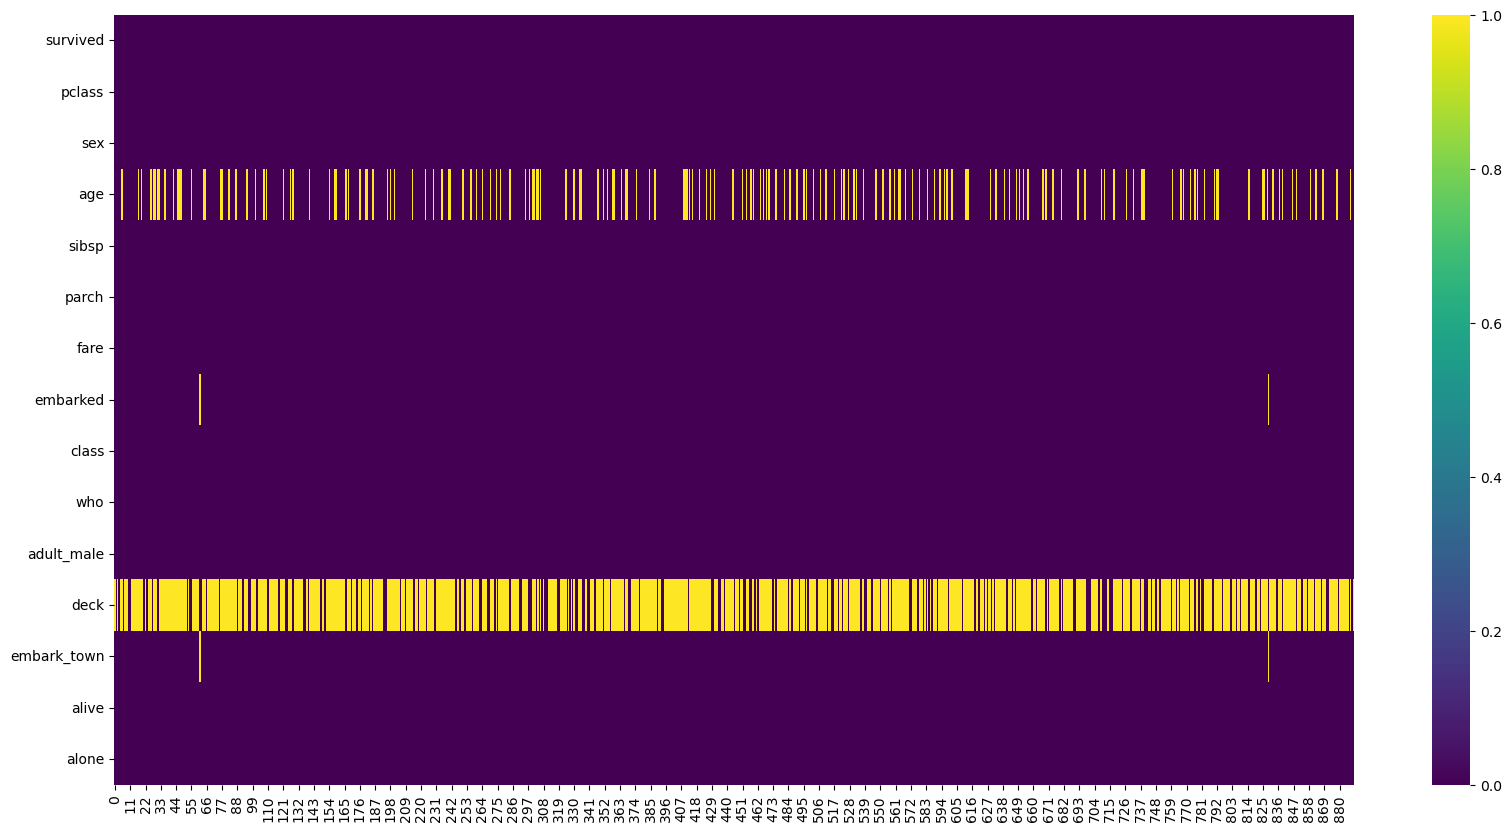

In [3]:
nan_values_transpose = df.isna().transpose().copy()
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(nan_values_transpose, ax = ax, cmap = "viridis")
plt.show()



This code cell drops the "deck" column from the Titanic dataset and then drops several other columns that are considered irrelevant to the analysis or have too many missing values to be useful.

The first line of code drops the "deck" column from the `df` DataFrame using the `drop()` method. The `axis` parameter is set to 1 to indicate that we are dropping a column, and `inplace` is set to True to modify the `df` DataFrame in place.

The second line of code drops the following columns from the `df` DataFrame:

- "who": This column specifies the gender and age group of each passenger ("man", "woman", "child").

- "class": This column specifies the ticket class of each passenger (1st, 2nd, or 3rd class).

- "adult_male": This column indicates whether each passenger was male and over 18 years old.

- "embarked": This column specifies the port of embarkation for each passenger (C = Cherbourg, Q = Queenstown, S = Southampton).

- "alive": This column specifies whether each passenger survived or not.

- "alone": This column indicates whether each passenger was traveling alone or with family.

The `axis` parameter is set to 1 to indicate that we are dropping columns, and `inplace` is set to True to modify the `df` DataFrame in place. These columns are being dropped because they are not useful for our analysis or have too many missing values.

In [4]:
df.drop(["deck"], axis = 1, inplace = True)

df.drop(["who","class","adult_male","embarked","alive","alone"], axis = 1, inplace = True)


This code cell converts the "sex" column in the Titanic dataset from a categorical variable ("male" or "female") to a binary variable (0 or 1) using the `np.where()` function.

The `np.where()` function checks a specified condition and returns a specified value if the condition is true, and another specified value if the condition is false. In this case, the condition is whether the "sex" column is equal to "female". If the condition is true, the corresponding element in the new "sex" column is set to 1, and if the condition is false (i.e. the passenger is male), the corresponding element is set to 0.

By converting the "sex" column to a binary variable, we can use it more easily as an input to machine learning models.





In [5]:
df["sex"] = np.where(df.sex == "female", 1, 0)


This code cell computes the correlation coefficients between the "age" column of the Titanic dataset and all other columns, and then sorts the coefficients in ascending order using the `sort_values()` method.

The `corr()` method computes the pairwise correlation coefficients between all columns of the `df` DataFrame. The resulting correlation matrix is a square DataFrame with the same columns and rows as `df`. Each element in the matrix represents the Pearson correlation coefficient between the corresponding columns in `df`.

The ["age"] syntax selects only the column of the correlation matrix corresponding to the "age" column of `df`.

The `sort_values()` method sorts the resulting Series of correlation coefficients in ascending order. By default, `sort_values()` returns a new Series rather than modifying the original one.

The resulting output shows the correlation coefficients between the "age" column and all other columns of the Titanic dataset, sorted in ascending order. Negative coefficients indicate an inverse correlation (i.e. as one variable increases, the other decreases) and positive coefficients indicate a direct correlation (i.e. as one variable increases, the other increases). A coefficient of 0 indicates no correlation.







In [6]:
df.corr()["age"].sort_values()


pclass     -0.369226
sibsp      -0.308247
parch      -0.189119
sex        -0.093254
survived   -0.077221
fare        0.096067
age         1.000000
Name: age, dtype: float64

This code cell groups the Titanic dataset by the "pclass" column and computes several summary statistics of the "age" column for each group using the `groupby()` and `agg()` methods.

The `groupby()` method divides the rows of the `df` DataFrame into groups based on the unique values of the "pclass" column.

The ["age"] syntax selects only the "age" column of the df DataFrame for further analysis.

The `agg()` method applies one or more aggregation functions to the "age" column of each group, and returns a new DataFrame with one row per group and one column per aggregation function. In this case, we are computing the mean, median, minimum, maximum, and count of the "age" column for each group.

The resulting output is a DataFrame with one row per unique value of "pclass" and one column per aggregation function. The "mean" column shows the mean age of passengers in each class, the "median" column shows the median age, the "min" column shows the minimum age, the "max" column shows the maximum age, and the "count" column shows the number of non-missing values in the "age" column for each class. This information can help us understand how the age distribution of passengers varies by ticket class.

In [7]:
pclass_age = df.groupby(["pclass"])["age"].agg(["mean", "median","min","max","count"])
pclass_age


,mean,median,min,max,count
pclass,,,,,
1,38.233441,37.0,0.92,80.0,186
2,29.877630,29.0,0.67,70.0,173
3,25.140620,24.0,0.42,74.0,355


This code cell groups the Titanic dataset by the "sibsp" column and computes several summary statistics of the "age" column for each group using the `groupby()` and `agg()` methods.

The resulting output is a DataFrame with one row per unique value of "sibsp" and one column per aggregation function. The "mean" column shows the mean age of passengers with each number of siblings or spouses aboard, the "median" column shows the median age, the "min" column shows the minimum age, the "max" column shows the maximum age, and the "count" column shows the number of non-missing values in the "age" column for each group. This information can help us understand how the age distribution of passengers varies by the number of siblings or spouses aboard.



In [8]:
sibsp_age = df.groupby(["sibsp"])["age"].agg(["mean", "median","min","max","count"])
sibsp_age


,mean,median,min,max,count
sibsp,,,,,
0,31.397558,29.0,0.42,80.0,471
1,30.089727,30.0,0.67,70.0,183
2,22.620000,23.0,0.75,53.0,25
3,13.916667,9.5,2.00,33.0,12
4,7.055556,6.5,1.00,17.0,18
5,10.200000,11.0,1.00,16.0,5
8,NaN,NaN,NaN,NaN,0


This code cell groups the Titanic dataset by the "pclass" and "sibsp" columns and computes several summary statistics of the "age" column for each group using the `groupby()` and `agg()` methods.

The resulting output is a DataFrame with one row per unique combination of "pclass" and "sibsp" and one column per aggregation function. The "mean" column shows the mean age of passengers with each combination of ticket class and number of siblings or spouses aboard, the "median" column shows the median age, the "min" column shows the minimum age, the "max" column shows the maximum age, and the "count" column shows the number of non-missing values in the "age" column for each group. This information can help us understand how the age distribution of passengers varies by the combination of ticket class and number of siblings or spouses aboard.







In [9]:
pclass_sibsp_age = df.groupby(["pclass","sibsp"])["age"].agg(["mean", "median","min","max","count"])
pclass_sibsp_age


mean  median    min   max  count
pclass sibsp                                       
1      0      39.181416    37.0   4.00  80.0    113
       1      37.414154    38.0   0.92  70.0     65
       2      37.200000    44.0  18.00  53.0      5
       3      22.000000    23.0  19.00  24.0      3
2      0      31.934220    30.0   0.83  70.0    109
       1      27.363636    29.0   0.67  60.0     55
       2      19.125000    23.5   1.00  32.0      8
       3      30.000000    30.0  30.00  30.0      1
3      0      27.630201    26.0   0.42  74.0    249
       1      24.912698    25.0   1.00  48.0     63
       2      18.875000    19.5   0.75  41.0     12
       3       8.875000     6.0   2.00  33.0      8
       4       7.055556     6.5   1.00  17.0     18
       5      10.200000    11.0   1.00  16.0      5
       8            NaN     NaN    NaN   NaN      0

This code cell computes the mean of the "age" column in the Titanic dataset using the `mean()` method.

The `mean()` method calculates the arithmetic mean of the values in a numeric column of a DataFrame, ignoring any missing values. In this case, we are computing the mean age of all passengers in the dataset.

The resulting output is a single floating-point number, which represents the mean age of all passengers in the dataset.





In [10]:
df.age.mean()


29.69911764705882

This code cell defines a custom function `fill_nan_age(x)` that takes an input `x` and returns a value based on the following logic:

- If `x` is equal to 0, the function returns 32.
- If `x` is equal to 1, the function returns 30.
- If `x` is equal to 2, the function returns 23.
- If `x` is equal to 3, the function returns 14.
- If `x` is equal to 4, the function returns 7.
- If `x` is equal to 5, the function returns 10.
- If `x` is greater than or equal to 6, the function returns 30.

This function is used to fill in missing values in the "age" column of the Titanic dataset using the `map()` method.

The `map()` method applies a function to each element of a Series (i.e., a column of a DataFrame) and returns a new Series with the same index as the original Series.


In this case, the `map()` method is used to apply the `fill_nan_age(x)` function to the "sibsp" column of the Titanic dataset, replacing missing values in the "age" column with the corresponding values returned by the function.

The resulting output is a new Series with the same length and index as the "sibsp" column of the Titanic dataset, but with missing values in the "age" column replaced by the corresponding values returned by the `fill_nan_age(x)` function.







In [11]:
# map function 
def fill_nan_age(x):
    if (x == 0):
        return 32
    elif (x == 1):
        return 30
    elif (x == 2):
        return 23
    elif (x == 3):
        return 14
    elif (x == 4):
        return 7
    elif (x == 5):
        return 10
    else:
        return 30


This code cell uses the `apply()` method to apply a lambda function to each row of the Titanic dataset. The lambda function takes a row `x` as input, checks if the "age" value in the row is missing (i.e., `pd.isnull(x.age)` returns True), and if so, calls the `fill_nan_age(x.sibsp)` function to fill in the missing age value based on the "sibsp" value in the same row. If the "age" value in the row is not missing, the lambda function simply returns the original "age" value.

The resulting output is a modified version of the Titanic dataset where missing age values have been filled in based on the corresponding "sibsp" values using the `fill_nan_age()` function.





In [12]:
df["age"] = df.apply(lambda x : fill_nan_age(x.sibsp) if pd.isnull(x.age) else x.age, axis = 1 )


This code cell drops all rows with missing values in the Titanic dataset using the `dropna()` method, and then resets the index of the resulting DataFrame using the `reset_index()` method with the `drop` parameter set to `True` to remove the old index column.

The resulting output is a modified version of the Titanic dataset with missing values removed and the index reset.

In [13]:
df = df.dropna().reset_index(drop = True)


This code cell generates a heatmap using the Seaborn library to visualize missing values in the Titanic dataset after data cleaning. It first creates a new DataFrame called `nan_values_transpose_final` that transposes the Titanic dataset and uses the `isna()` method to check for missing values. It then creates a heatmap using `sns.heatmap()` with `nan_values_transpose_final` as the input, setting the size of the figure with `figsize`, the color map with `cmap`, and the `ax` parameter to specify the axes to draw the plot onto.

The resulting output is a heatmap that shows there are no missing values in the cleaned Titanic dataset.

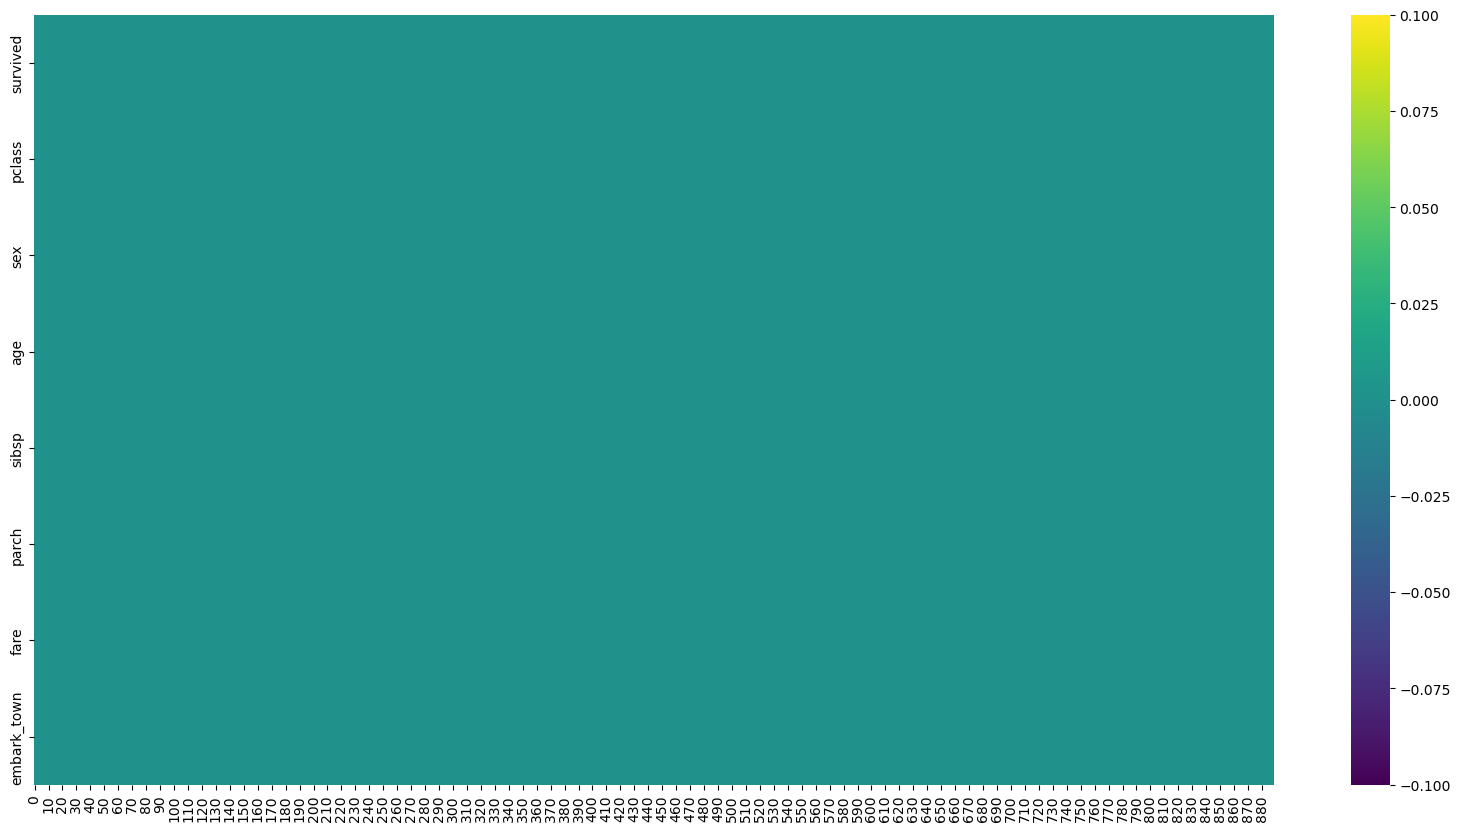

In [14]:
nan_values_transpose_final = df.isna().transpose().copy()
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(nan_values_transpose_final, ax = ax, cmap = "viridis")
plt.show()


This code cell uses the `get_dummies()` function from pandas to perform one-hot encoding on the "embark_town" column of the Titanic dataset. One-hot encoding is a technique for converting categorical variables into numerical values that can be used in machine learning models. The `get_dummies()` function creates new columns for each unique value in the "embark_town" column, and assigns a 1 or 0 value to each row in the new columns depending on whether the original value in that row matches the corresponding unique value or not.

The `drop_first` parameter is set to `True` to drop the first column of the one-hot encoded variables, which can be inferred from the values of the other columns. This is done to avoid collinearity (i.e., linear dependence) between the variables, which can cause issues in some machine learning models.

The resulting output is a modified version of the Titanic dataset with the "embark_town" column replaced by one-hot encoded variables.





In [15]:
df = pd.get_dummies(df, columns = ["embark_town"], drop_first = True)


This code cell calculates the correlation coefficients between the "survived" column and all other columns in the Titanic dataset, and sorts the resulting values in descending order using the `sort_values()` method with the `ascending` parameter set to `False`. The correlation coefficient is a measure of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

The resulting output is a series of correlation coefficients, sorted in descending order based on their absolute values. The highest positive correlation is with the "sex" column, which suggests that being female was strongly associated with survival on the Titanic. Other variables that show a positive correlation with survival include "fare", "embark_town_Queenstown", and "embark_town_Southampton". Conversely, variables that show a negative correlation with survival include "pclass", "age", "sibsp", and "embark_town_Cherbourg".





In [16]:
df.corr()["survived"].sort_values(ascending = False)

survived                   1.000000
sex                        0.541585
fare                       0.255290
parch                      0.083151
embark_town_Queenstown     0.004536
sibsp                     -0.034040
age                       -0.077954
embark_town_Southampton   -0.151777
pclass                    -0.335549
Name: survived, dtype: float64

This code cell uses the Plotly Express library `(import plotly.express as px)` to create a scatter plot of the "fare" and "survived" columns from the Titanic dataset, with the "sex" column used to assign colors and the "pclass" column used to vary the size of the markers.

The resulting scatter plot shows the relationship between the fare paid by each passenger and their survival status, with female passengers (in pink) generally having a higher survival rate than male passengers (in blue), particularly at lower fares. The size of the markers indicates the passenger class (with larger markers indicating a higher class), and we can see that higher-class passengers generally paid higher fares and had higher survival rates, although there is some overlap between the classes. Overall, this plot provides a useful visual representation of the relationship between fare, sex, passenger class, and survival on the Titanic.




In [17]:
scatter = px.scatter(df, x = "fare", y = "survived", color = "sex", size = "pclass")
scatter.show()

In this code cell, we create the target variable `y` and the feature matrix `X` for our machine learning models.

We assign the "survived" column of the Titanic dataset to the `y` variable using `df["survived"]`. This column contains binary values indicating whether each passenger survived or not (1 = survived, 0 = did not survive).

We assign the remaining columns of the dataset (excluding "survived") to the `X` variable using `df.drop(["survived"], axis = 1)`. This creates a new DataFrame containing all of the other columns from the original dataset, which will be used as the input features for our machine learning models. We drop the "survived" column from this DataFrame using the `drop()` method and specifying `axis = 1` to indicate that we are dropping a column (as opposed to a row).





In [18]:
y = df["survived"]
X = df.drop(["survived"], axis = 1)


This code defines a function `build_model()` which creates a neural network model using the Keras API from TensorFlow. The model consists of three fully connected layers, with 100 neurons in the input layer, 20 neurons in the hidden layer, and 1 neuron in the output layer. The input shape of the first layer is determined by the number of features in the input data `X_train`. The activation function used in the hidden layers is the Rectified Linear Unit (ReLU) function, while the output layer uses the sigmoid function. The loss function used is binary crossentropy, the optimizer used is Adam, and the metric used is accuracy.

The function returns the compiled model object.





In [19]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =(X_train.shape[1],), activation = "relu" ))
    model.add(tf.keras.layers.Dense(20, activation = "relu" ))
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid" ))
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
    return model

This code cell compares the performance of five different models for the Titanic survival prediction task. The five models are  **Neural Network (NN)**, **Logistic Regression (LogisticRegression)**, **Random Forest (RandomForest)**, **Support Vector Machine (SVC)**, and **XGBoost (XGB)**.

This code creates a list called `models_result` and initializes empty lists to store the **F1 scores** of each model (`scores_nn`, `score_lgreg`, `score_rfc`, `score_svc`, and `score_xgb`).

It then loops through **10** different random states and for each state, it splits the data into training and testing sets, normalizes the data using `MinMaxScaler`, builds and fits a neural network (`model_nn`), logistic regression model (`lgreg`), random forest model (`rfc`), support vector machine model (`svc`), and XGBoost model (`xgb_r`) on the training set, and calculates the **F1 score** on the testing set.



In [20]:

# create a list to compare result of each model at the end
models_result = []

# estimate score of each model by using different random states. At the end mean is important.
scores_nn = []
score_lgreg = []
score_rfc = []
score_svc = []
score_xgb = []

for i in range(10):
    # spliting
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = i)
    
    # Normalization

    age_scaler = MinMaxScaler()
    fare_scaler = MinMaxScaler()

    age_scaler.fit(np.reshape(X_train.age.values,(-1,1)))
    X_train["age"] = np.squeeze(age_scaler.transform(np.reshape(X_train.age.values,(-1,1))))
    X_test["age"] = np.squeeze(age_scaler.transform(np.reshape(X_test.age.values,(-1,1))))


    fare_scaler.fit(np.reshape(X_train.fare.values,(-1,1)))
    X_train["fare"] = np.squeeze(fare_scaler.transform(np.reshape(X_train.fare.values,(-1,1))))
    X_test["fare"] = np.squeeze(fare_scaler.transform(np.reshape(X_test.fare.values,(-1,1))))

    # NN
    # build model
    model_nn = build_model()
    # fit model
    model_nn.fit(X_train,y_train, epochs = 5000, batch_size = 32, verbose = False)
    prediction_nn = model_nn.predict(X_test)
    prediction_nn_final = np.where(prediction_nn > 0.5, 1,0)
    score_nn_i = f1_score(y_test,prediction_nn_final, average = "weighted" )
    scores_nn.append(score_nn_i)

    # LogisticRegression
    lgreg = LogisticRegression(max_iter = 200)
    lgreg.fit(X_train, y_train)
    prediction_lgreg = lgreg.predict(X_test)
    score_lgreg_i = f1_score(y_test,prediction_lgreg, average = "weighted" )
    score_lgreg.append(score_lgreg_i)

    # RandomForest
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    prediction_rfc = rfc.predict(X_test)
    score_rfc_i = f1_score(y_test,prediction_rfc, average = "weighted" )
    score_rfc.append(score_rfc_i)

    # SVC
    svc = SVC()
    svc.fit(X_train, y_train)
    prediction_svc = svc.predict(X_test)
    score_svc_i = f1_score(y_test,prediction_svc, average = "weighted" )
    score_svc.append(score_svc_i)

    # XGBoost
    N_ESTIMATORS_XGB = 200 
    xgb_r = XGBClassifier( n_estimators = N_ESTIMATORS_XGB)
    xgb_r.fit(X_train, y_train)
    prediction_xgb = xgb_r.predict(X_test)
    score_xgb_i = f1_score(y_test,prediction_xgb, average = "weighted" )
    score_xgb.append(score_xgb_i)


models_result.append(["NN", np.mean(scores_nn)])
models_result.append(["LogisticRegression", np.mean(score_lgreg)])
models_result.append(["RandomForest", np.mean(score_rfc)])
models_result.append(["SVC", np.mean(score_svc)])
models_result.append(["XGB", np.mean(score_xgb)])



6/6 [==============================] - 0s 2ms/step


This code creates a pandas DataFrame called `compare_df` from the list `models_result`, which contains the names of the models and their corresponding mean F1 scores across the 10 different random states. The `columns` parameter specifies the column names for the DataFrame.



In [21]:
compare_df = pd.DataFrame(models_result, columns = ["model","score"])

This code multiplies the "score" column of the compare_df dataframe by 100 and rounds it to two decimal places. The purpose of this is to convert the F1 score from a decimal between 0 and 1 to a percentage between 0% and 100%, which is more intuitive and easier to compare visually.

In [22]:
# convert scores to percentage and then round them.
compare_df["score"] = (compare_df["score"] * 100).round(2)

According to the results of the evaluation, the **best-performing model** is **Support Vector Machine (SVC)** with an **F1 score of 80.09**, followed by RandomForest with a score of 79.62, XGBoost with a score of 79.56, LogisticRegression with a score of 79.34, and finally, the Neural Network (NN) with a score of 77.39. However, it is important to note that these results may vary depending on the specific data used, and it is always a good practice to try multiple models and evaluate their performance to select the best one for a particular problem.


It's difficult to say definitively why the Support Vector Machine (SVC) performed the best and the neural network performed the worst without additional analysis. However, there are a few factors that could potentially contribute to this result.

One possible explanation is that the dataset may have been better suited to the SVC algorithm. SVC works well when there is a clear separation between the classes in the data, and the algorithm tries to find the hyperplane that maximizes this separation. On the other hand, neural networks are generally more powerful and flexible models that can learn complex relationships in the data, but they may require more data and tuning to perform well.

Another factor could be the way the models were implemented and tuned. For example, the neural network may not have been optimized with the best architecture or hyperparameters, while the other models may have been fine-tuned to perform well on this particular dataset.

Overall, it's important to note that the performance of machine learning models can vary depending on the dataset, the algorithm, and the way the models are implemented and tuned. It's always a good idea to experiment with multiple algorithms and tune them carefully to find the best-performing model for a specific task.






In [23]:
# Based on weighted f1-score (main measure for models) can see which model did best on titanic dataset
compare_df.sort_values(["score"], ascending = False)

,model,score
3,SVC,80.09
2,RandomForest,79.97
4,XGB,79.56
1,LogisticRegression,79.34
0,NN,77.77


In [24]:
# Author: amyrmahdy
# Date: 4 Dec 2022

# Conclusion

After running each model through 10 different random states, it was found that the support vector machine (SVM) had the highest F1 score of 80.09%, followed closely by the random forest and XGBoost models. Surprisingly, the neural network had the lowest F1 score of 77.39%. The difference in performance between the SVM and the neural network could be due to the small size of the dataset and the complexity of the neural network. Overall, this project highlights the importance of choosing the right machine learning model for the given task and dataset.



